<a href="https://colab.research.google.com/github/dareenhussein/PMDL/blob/main/Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table align="center">
  <td align="center"><a target="_blank" href="https://colab.research.google.com/github/KhaledElTahan/DeepLearning/blob/master/Labs/lab2/lab2.ipynb">
        <img src="http://introtodeeplearning.com/images/colab/colab.png?v2.0"  style="padding-bottom:5px;" />Run in Google Colab</a></td>
</table>

# Lab 2: Multinominal Classification

![Multinominal Classification Network](https://github.com/KhaledElTahan/DeepLearning/blob/master/Labs/lab2/multinominal_classification_net.png?raw=1)

## 2.1 Problem Statement

In this assignment we will be addressing the task of multinominal classification of handwritten digits from the famous MNIST dataset. 

The MNIST dataset consists of 60,000 training images and 10,000 test images.  Our classes are the digits 0-9.

You are required to build 2 models to solve this problem:
1. A simple using fully connected layers.
2. A model using Convolutional Neural Network (CNN) before applying the simple model.

You should perform different experiments on the two models, observe the difference in **accuracy** and report them.

## 2.2 Problem Details

### 2.2.1 Dataset Loading

#### Import Needed packages

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import random
from progressbar import progressbar
from tensorflow.keras import regularizers



#### Load Dataset

In [ ]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (val_images, val_labels) = mnist.load_data()

train_images = np.expand_dims(train_images, axis=-1) / 255.
train_labels = np.int64(train_labels)

val_images = np.expand_dims(val_images, axis=-1) / 255.
val_labels = np.int64(val_labels)

#### Plot Dataset Sample

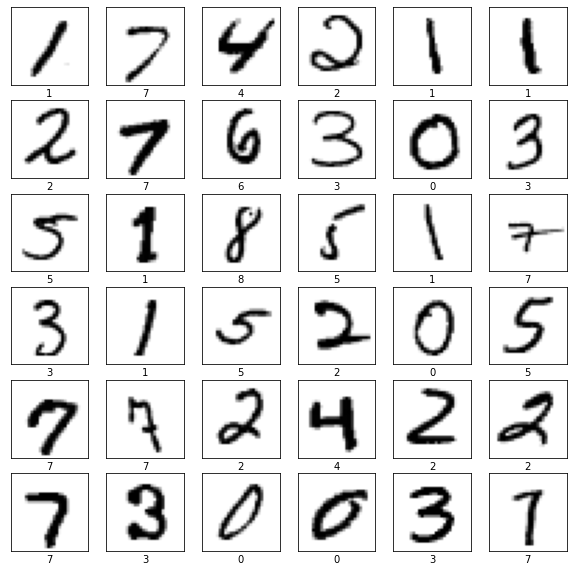

In [ ]:
plt.figure(figsize=(10, 10))
random_inds = np.random.choice(60000, 36)
for i in range(36):
    plt.subplot(6, 6, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    image_ind = random_inds[i]
    plt.imshow(np.squeeze(train_images[image_ind]), cmap=plt.cm.binary)
    plt.xlabel(train_labels[image_ind])

### 2.2.1 Fully Connected Neural Network Solution

Build a neural network, using tf.keras, consisting of 2 fully connected layers and apply this to the digit classification task, Our network will ultimately output a probability distribution over the 10 digit classes (0-9).

![Two Layer Neural Network](https://github.com/KhaledElTahan/DeepLearning/blob/master/Labs/lab2/2layer_nn.png?raw=1)

#### Define the Two-Layer Neural Network

**TODO** 

1. Define two layer neural network exactly as in the previous figure by adding two [dense layers](https://keras.io/api/layers/core_layers/dense/).
2. Try different [activation functions](https://keras.io/api/layers/#layer-activations) for both layers (ReLU, Tanh, and other activations for first layer - Softmax, and other activations for output layer), and report the difference in **accuracy** and plots.
3. Try different [regularization kernerls](https://keras.io/api/layers/#layer-weight-regularizers), and [regularization layers](https://keras.io/api/layers/#regularization-layers) (L1, L2, Dropout, and other regularizations), and report the difference in **accuracy** and plots. 

In [ ]:
activation = tf.keras.layers.LeakyReLU(alpha=0.3,)
def build_fc_model():
  fc_model = tf.keras.Sequential([
      # First define a Flatten layer
      tf.keras.layers.Flatten(),
      # '''TODO: Define the first fully connected layer. Try different activation functions.'''
      tf.keras.layers.Dense(128, activation= 'relu', kernel_initializer='he_uniform', kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4)),
      # '''TODO: Define the second Dense layer to output the classification probabilities. Try different activation functions.'''
      tf.keras.layers.Dense(16, activation= 'softmax')
  ])
  return fc_model

#### Compile the Two-Layer Neural Network

**TODO** 

1. Try different [optimizers](https://keras.io/api/optimizers/), and report the difference in **accuracy** and plots.
2. For each optimizer, try different learning rates and other hyperparameters (If applicable), and report the difference in **accuracy** and plots.
3. Try different [loss functions](https://keras.io/api/losses/), and report the difference in **accuracy** and plots. 

In [ ]:
fc_model = build_fc_model()

'''TODO: Experiment with different optimizers and learning rates. How do these affect
    the accuracy of the trained model? Which optimizers and/or learning rates yield
    the best performance?'''
fc_model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=1e-1), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#### Print the Two-Layer Neural Network Model Summary

In [ ]:
fc_model.build((None, train_images.shape[1], train_images.shape[2], train_images.shape[3]))
fc_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_5 (Dense)              (None, 16)                2064      
Total params: 102,544
Trainable params: 102,544
Non-trainable params: 0
_________________________________________________________________


#### Train the Two-Layer Neural Network

In [ ]:
BATCH_SIZE = 64
EPOCHS = 5

nn_hist = fc_model.fit(train_images, train_labels, validation_data=(val_images, val_labels), batch_size=BATCH_SIZE, epochs=EPOCHS)

Epoch 1/5
938/938 [==============================] - 3s 2ms/step - loss: 0.6695 - accuracy: 0.8332 - val_loss: 0.2987 - val_accuracy: 0.9360
Epoch 2/5
938/938 [==============================] - 2s 2ms/step - loss: 0.2866 - accuracy: 0.9379 - val_loss: 0.2363 - val_accuracy: 0.9533
Epoch 3/5
938/938 [==============================] - 2s 2ms/step - loss: 0.2266 - accuracy: 0.9554 - val_loss: 0.2043 - val_accuracy: 0.9622
Epoch 4/5
938/938 [==============================] - 2s 2ms/step - loss: 0.1939 - accuracy: 0.9640 - val_loss: 0.1886 - val_accuracy: 0.9640
Epoch 5/5
938/938 [==============================] - 2s 2ms/step - loss: 0.1713 - accuracy: 0.9710 - val_loss: 0.1704 - val_accuracy: 0.9704


#### Plot the Accuracy Curve for the Two-Layer Neural Network

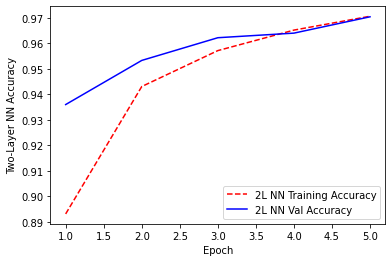

In [ ]:
# Get training and validation accuracy histories
training_acc = nn_hist.history['accuracy']
val_acc = nn_hist.history['val_accuracy']

# Create count of the number of epochs
epoch_count = range(1, EPOCHS + 1)

# Visualize accuracy history
plt.figure()
plt.plot(epoch_count, training_acc, 'r--')
plt.plot(epoch_count, val_acc, 'b-')
plt.legend(['2L NN Training Accuracy', '2L NN Val Accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Two-Layer NN Accuracy')
plt.show()

#### Evaluate the Two-Layer Neural Network

In [ ]:
val_loss, val_acc = fc_model.evaluate(val_images, val_labels)

print('Validation Accuracy:', val_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.1704 - accuracy: 0.9704
Validation Accuracy: 0.9703999757766724


### 2.2.2 Convolutional Neural Network Solution

Build a CNN, using tf.keras, composed of two convolutional layers and pooling layers, followed by two fully connected layers, and ultimately output a probability distribution over the 10 digit classes (0-9).

![CNN Model](https://github.com/KhaledElTahan/DeepLearning/blob/master/Labs/lab2/cnn_model.png?raw=1)

#### Define the Convolutional Neural Network

**TODO** 

1. Define the convolutional network exactly as in the previous figure by adding two [dense layers](https://keras.io/api/layers/core_layers/dense/).
2. Try different [activation functions](https://keras.io/api/layers/#layer-activations) for both layers (ReLU, Tanh, and other activations for first layer - Softmax, and other activations for output layer), and report the difference in **accuracy** and plots.
3. Try different [regularization kernerls](https://keras.io/api/layers/#layer-weight-regularizers), and [regularization layers](https://keras.io/api/layers/#regularization-layers) (L1, L2, Dropout, and other regularizations), and report the difference in **accuracy** and plots. 
4. Try different [convolution filter sizes](https://keras.io/api/layers/convolution_layers/convolution2d/), and report the difference in accuracy and plots.
5. For each convolution filter, try different stride lengthes, and report the difference in accuracy and plots.
6. Try different [pooling layers](https://keras.io/api/layers/pooling_layers/) (i.e. change first and second pooling layers into other different pooling layers), and report the difference in accuracy and plots.

**NOTE: Variations for the filter sizes, stride lengths and pooling layers, will mean of course that you will have to use different number of units for the next layers (i.e. you won't stick to the above mentioned figure once you try those variations).**

In [ ]:
def build_cnn_model():
    cnn_model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(filters=24, kernel_size=(3,3), input_shape=(28, 28, 1), activation=tf.nn.relu),      

        tf.keras.layers.MaxPool2D(pool_size=(2,2)),

        #'''TODO: Define the second convolutional layer'''
        tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), input_shape=(28, 28, 1), padding='same', activation='relu', kernel_initializer='he_uniform'),      

        #'''TODO: Define the second max pooling layer'''
        tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(1,1)),

        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation=tf.nn.relu),

        #'''TODO: Define the last Dense layer'''
        tf.keras.layers.Dense(10, activation = "softmax"),

    ])
    return cnn_model

#### Compile the Convolutional Neural Network

**TODO** 

1. Try different [optimizers](https://keras.io/api/optimizers/), and report the difference in **accuracy** and plots.
2. For each optimizer, try different learning rates and other hyperparameters (If applicable), and report the difference in **accuracy** and plots.
3. Try different [loss functions](https://keras.io/api/losses/), and report the difference in **accuracy** and plots. 

In [ ]:
cnn_model = build_cnn_model()

'''TODO: Experiment with different optimizers and learning rates. How do these affect
    the accuracy of the trained model? Which optimizers and/or learning rates yield
    the best performance?'''
cnn_model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=1e-1), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#### Print the Convolutional Neural Network Model Summary

In [ ]:
cnn_model.build((None, train_images.shape[1], train_images.shape[2], train_images.shape[3]))
cnn_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 24)        240       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 24)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 32)        6944      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               589952    
_________________________________________________________________
dense_7 (Dense)              (None, 10)               

#### Train the Convolutional Neural Network

In [ ]:
BATCH_SIZE = 64
EPOCHS = 5

cnn_hist = cnn_model.fit(train_images, train_labels, validation_data=(val_images, val_labels), batch_size=BATCH_SIZE, epochs=EPOCHS)

Epoch 1/5
938/938 [==============================] - 33s 3ms/step - loss: 0.4620 - accuracy: 0.8519 - val_loss: 0.0870 - val_accuracy: 0.9715
Epoch 2/5
938/938 [==============================] - 3s 3ms/step - loss: 0.0567 - accuracy: 0.9828 - val_loss: 0.0703 - val_accuracy: 0.9765
Epoch 3/5
938/938 [==============================] - 3s 3ms/step - loss: 0.0370 - accuracy: 0.9893 - val_loss: 0.0312 - val_accuracy: 0.9899
Epoch 4/5
938/938 [==============================] - 3s 3ms/step - loss: 0.0253 - accuracy: 0.9919 - val_loss: 0.0258 - val_accuracy: 0.9911
Epoch 5/5
938/938 [==============================] - 3s 3ms/step - loss: 0.0203 - accuracy: 0.9940 - val_loss: 0.0600 - val_accuracy: 0.9816


#### Plot the Accuracy Curve for the Convolutional Neural Network

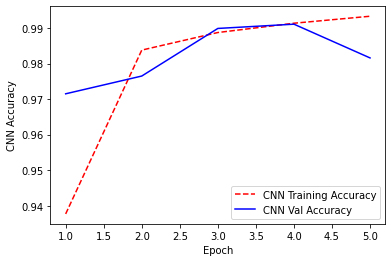

In [ ]:
# Get training and validation accuracy histories
training_acc = cnn_hist.history['accuracy']
val_acc = cnn_hist.history['val_accuracy']

# Create count of the number of epochs
epoch_count = range(1, EPOCHS + 1)

# Visualize accuracy history
plt.figure()
plt.plot(epoch_count, training_acc, 'r--')
plt.plot(epoch_count, val_acc, 'b-')
plt.legend(['CNN Training Accuracy', 'CNN Val Accuracy'])
plt.xlabel('Epoch')
plt.ylabel('CNN Accuracy')
plt.show()

#### Evaluate the Convolutional Neural Network

In [ ]:
val_loss, val_acc = cnn_model.evaluate(val_images, val_labels)

print('Validation Accuracy:', val_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0600 - accuracy: 0.9816
Validation Accuracy: 0.9815999865531921


### One Final Question

What is the highest accuracy you’re able to achieve using the CNN model, and how does the accuracy of the CNN model compare to the accuracy of the simple fully connected network?

## 2.3 Conclusion

That's it! Congratulations on training a multinominal classification models.

Make sure you deliver all the requirements for the submission.